In [1]:
import pandas as pd
from tqdm import tqdm
tqdm.pandas()

In [2]:
data = pd.read_csv('Cleaned-Updated-Keyword.csv')

In [3]:
data = data.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Keywords'], axis = 1)
data.head(5)

,Title,Article,Category,Summary,Article_clean,Summary_clean,Keywords_extracted,Keywords_list
0,Masaccio,"Masaccio (UK: , US: , Italian: [maˈzattʃo]; De...",People,"Masaccio (UK: , US: , Italian: [maˈzattʃo]; De...",masaccio italian decemb 1401 summer 1428 born ...,masaccio italian december 1401 summer 1428 bor...,masaccio italian paint work fresco perspect th...,"['masaccio', 'italian', 'paint', 'work', 'fres..."
1,Hokusai,"Katsushika Hokusai (葛飾 北斎, c. 31 October 1760 ...",People,"Katsushika Hokusai (葛飾 北斎, c. 31 October 1760 ...",katsushika hokusai octob 1760 may 1849 known s...,katsushika hokusai october 1760 may 1849 known...,hokusai octob japan art style isbn japanes uki...,"['hokusai', 'octob', 'japan', 'art', 'style', ..."
2,Steven Spielberg,"Steven Allan Spielberg (; born December 18, 1...",People,"Steven Allan Spielberg (; born December 18, 1...",steven allan spielberg born decemb 1946 americ...,steven allan spielberg born december 1946 amer...,spielberg born decemb critic american film dir...,"['spielberg', 'born', 'decemb', 'critic', 'ame..."
3,Che Guevara,"Ernesto ""Che"" Guevara (Spanish: [ˈtʃe ɣeˈβaɾa]...",People,"Ernesto ""Che"" Guevara (Spanish: [ˈtʃe ɣeˈβaɾa]...",ernesto che guevara spanish june 1928 octob 19...,ernesto che guevara spanish june 1928 october ...,ernesto che guevara spanish june thi cuba unit...,"['ernesto', 'che', 'guevara', 'spanish', 'june..."
4,Jöns Jacob Berzelius,Baron Jöns Jacob Berzelius (Swedish: [jœns ˈjɑ...,People,Baron Jöns Jacob Berzelius (Swedish: [jœns ˈjɑ...,baron jacob berzeliu swedish contemporari name...,baron jacob berzelius swedish contemporary nam...,berzelius jacob berzeliu swedish work compound...,"['berzelius', 'jacob', 'berzeliu', 'swedish', ..."


In [4]:
def binary(genre_list):
    binaryList=[]
    for genres in data["Category"]:
        if genres in genre_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    return binaryList

In [5]:
data['Category_bin'] = data['Category'].apply(lambda x: binary(x))
data['Category_bin'].head()

0    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
1    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
2    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
3    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
4    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
Name: Category_bin, dtype: object

In [6]:
data['Keywords_list_correct'] = data['Keywords_list'].str.strip('[]').str.replace(" ",'').str.lstrip().str.split(',')

In [7]:
words_list = []
for kw_list in data['Keywords_list_correct']:
    words_list.extend(kw_list)
words_list = pd.unique(words_list)

In [8]:
words_list = [word.replace("'", "") for word in words_list]

In [9]:
def binary(words):
    binaryList = []
    for w in words_list:
        if w in words:
            binaryList.append(1)
        else:
            binaryList.append(0)
    return binaryList

In [10]:
data['keywords_bin'] = data['Keywords_list_correct'].progress_apply(lambda x: binary(x))

100%|██████████| 10009/10009 [01:52<00:00, 89.35it/s]


In [11]:
import numpy as np
# Concatenate the features 
feature_matrix = []
for index, m in data.iterrows():
    feature_matrix.append([*m['Category_bin'], *m['keywords_bin']])

X = np.array(feature_matrix)
print(X)

[[1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [12]:
from sklearn.cluster import KMeans
from tqdm import tqdm
import time

RANDOM_STATE = 42
MAX_CLUSTERS = 15

kms = []
inertia_values = []
time_values = []

for i in tqdm(range(1, MAX_CLUSTERS + 1)):
    start_time = time.time()
    km = KMeans(n_clusters = i, random_state = RANDOM_STATE).fit(X)
    end_time = time.time()
    kms.append(km)
    inertia_values.append(km.inertia_)
    time_values.append(end_time - start_time)


 73%|███████▎  | 11/15 [02:21<00:57, 14.41s/it]/tmp/ipykernel_5803/2968606377.py:14: ConvergenceWarning: Number of distinct clusters (11) found smaller than n_clusters (12). Possibly due to duplicate points in X.
  km = KMeans(n_clusters = i, random_state = RANDOM_STATE).fit(X)
 80%|████████  | 12/15 [03:53<01:54, 38.05s/it]/tmp/ipykernel_5803/2968606377.py:14: ConvergenceWarning: Number of distinct clusters (11) found smaller than n_clusters (13). Possibly due to duplicate points in X.
  km = KMeans(n_clusters = i, random_state = RANDOM_STATE).fit(X)
 87%|████████▋ | 13/15 [05:25<01:49, 54.58s/it]/tmp/ipykernel_5803/2968606377.py:14: ConvergenceWarning: Number of distinct clusters (11) found smaller than n_clusters (14). Possibly due to duplicate points in X.
  km = KMeans(n_clusters = i, random_state = RANDOM_STATE).fit(X)
 93%|█████████▎| 14/15 [06:58<01:06, 66.12s/it]/tmp/ipykernel_5803/2968606377.py:14: ConvergenceWarning: Number of distinct clusters (11) found smaller than n_clus

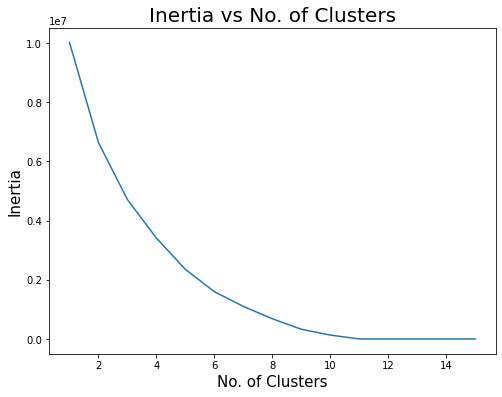

In [13]:
import matplotlib.pyplot as plt

# plot the Inertia vs No. of Clusters graph
fig, ax = plt.subplots(figsize = (8, 6))
plt.plot(range(1, MAX_CLUSTERS + 1), inertia_values)
plt.xlabel('No. of Clusters', fontsize = 15)
plt.ylabel('Inertia', fontsize = 15)
plt.title('Inertia vs No. of Clusters', fontsize = 20)
plt.show()


In [14]:
from collections import Counter

for i in range(1, MAX_CLUSTERS+1):
  print(str(i) + ' clusters: ', Counter(kms[i-1].labels_))

1 clusters:  Counter({0: 10009})
2 clusters:  Counter({0: 8017, 1: 1992})
3 clusters:  Counter({0: 6539, 1: 1992, 2: 1478})
4 clusters:  Counter({1: 5335, 2: 1992, 0: 1478, 3: 1204})
5 clusters:  Counter({0: 4235, 1: 1992, 2: 1478, 4: 1204, 3: 1100})
6 clusters:  Counter({2: 3309, 0: 1992, 3: 1478, 4: 1204, 1: 1100, 5: 926})
7 clusters:  Counter({3: 2569, 2: 1992, 1: 1478, 5: 1204, 0: 1100, 6: 926, 4: 740})
8 clusters:  Counter({1: 1992, 3: 1885, 2: 1478, 4: 1204, 5: 1100, 6: 926, 7: 740, 0: 684})
9 clusters:  Counter({1: 1992, 2: 1478, 3: 1214, 4: 1204, 5: 1100, 6: 926, 7: 740, 0: 684, 8: 671})
10 clusters:  Counter({1: 1992, 2: 1478, 4: 1204, 5: 1100, 6: 926, 7: 740, 3: 737, 0: 684, 8: 671, 9: 477})
11 clusters:  Counter({1: 1992, 2: 1478, 4: 1204, 5: 1100, 6: 926, 7: 740, 0: 684, 8: 671, 9: 477, 10: 437, 3: 300})
12 clusters:  Counter({1: 1992, 2: 1478, 4: 1204, 5: 1100, 6: 926, 7: 740, 0: 684, 8: 671, 9: 477, 10: 437, 3: 300})
13 clusters:  Counter({1: 1992, 2: 1478, 4: 1204, 5: 11

In [15]:
N_CLUSTERS = 10

data['Cluster'] = kms[N_CLUSTERS - 1].labels_
data_clusters = (data[['Title', 'Cluster']]
                  .sort_values(by = ['Cluster'], ascending = False)
                  .groupby('Cluster').head(10))
data_clusters = data_clusters.copy(deep = True)

In [16]:
for cluster_num in range(N_CLUSTERS):
    data_title = data_clusters[data_clusters['Cluster'] == cluster_num]['Title'].values.tolist()
    print('CLUSTER ', cluster_num + 1)
    print('Popular Title:', data_title)
    print()

CLUSTER  1
Popular Title: ['History of science', 'Thebes, Egypt', 'Caliphate of Córdoba', 'Wall Street Crash of 1929', 'Cretan War (1645–1669)', 'Lewis and Clark Expedition', 'Revolutions of 1848', 'Tibetan Empire', 'History of medicine', 'Collective farming']

CLUSTER  2
Popular Title: ['Ben Jonson', 'Diocletian', 'William I, German Emperor', 'Saint George', 'William Henry Bragg', 'Justus von Liebig', 'Tamar of Georgia', "Georgia O'Keeffe", 'Arthur Rimbaud', 'Modest Mussorgsky']

CLUSTER  3
Popular Title: ['Fungus', 'Snake', 'Fission (biology)', 'Weed', 'Sheep', 'Fat', 'Smilodon', 'Sexual dimorphism', 'African buffalo', 'Bleeding']

CLUSTER  4
Popular Title: ['Graph (discrete mathematics)', 'Subset', 'Axiom of choice', 'Ring (mathematics)', 'Riemann surface', 'Poincaré conjecture', 'Integer', "Cauchy's integral formula", 'Right angle', 'Classification of finite simple groups']

CLUSTER  5
Popular Title: ['Gulf of Thailand', 'Dnipro', 'Damietta', 'Apennine Mountains', 'Pakistan', 'Dr

In [18]:
from numpy import dot
from numpy.linalg import norm

def cos_sim(a, b):
    norm_a = norm(a)
    norm_b = norm(b)
    if norm_a == 0 or norm_b == 0:
        return 0
    return dot(a, b)/(norm_a*norm_b)

def cosine_dist(dataId1, dataId2, data):
    # Pass 'data' as an argument to the function
    a = data.iloc[dataId1]
    b = data.iloc[dataId2]
    
    genresA = a['Category_bin']
    genresB = b['Category_bin']
    genreDistance = 1- cos_sim(genresA, genresB)

    wordsA = a['keywords_bin']
    wordsB = b['keywords_bin']
    wordsDistance = 1- cos_sim(wordsA, wordsB)
       
    # Add weights to each feature distance based on the importance of the feature
    # The weights can be adjusted to fine-tune the results
    dist = (genreDistance * 0.4 + wordsDistance * 0.2) 
    
    return dist


In [19]:
print(data.iloc[692])

Title                                            Miguel Hidalgo y Costilla
Article                  Don Miguel Gregorio Antonio Ignacio Hidalgo y ...
Category                                                            People
Summary                  Don Miguel Gregorio Antonio Ignacio Hidalgo y ...
Article_clean            miguel gregorio antonio ignacio hidalgo costil...
Summary_clean            miguel gregorio antonio ignacio hidalgo costil...
Keywords_extracted       antonio ignacio hidalgo costilla insurg mexico...
Keywords_list            ['antonio', 'ignacio', 'hidalgo', 'costilla', ...
Category_bin             [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
Keywords_list_correct    ['antonio', 'ignacio', 'hidalgo', 'costilla', ...
keywords_bin             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Cluster                                                                  1
Name: 692, dtype: object


In [20]:
print(data.iloc[4053])

Title                                                               Eating
Article                  Eating (also known as consuming) is the ingest...
Category                                                     Everyday_life
Summary                  Eating (also known as consuming) is the ingest...
Article_clean            eat also known consum ingest food typic provid...
Summary_clean            eating also known consuming ingestion food typ...
Keywords_extracted       eat consum ingest food hormon bodi hunger brai...
Keywords_list            ['eat', 'consum', 'ingest', 'food', 'hormon', ...
Category_bin             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Keywords_list_correct    ['eat', 'consum', 'ingest', 'food', 'hormon', ...
keywords_bin             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Cluster                                                                  9
Name: 4053, dtype: object


In [21]:
cosine = cosine_dist(692, 4053, data)

In [22]:
print('Cosine similarity: {}'.format(round(cosine, 4)))

Cosine similarity: 0.6


In [23]:
new_id = list(range(0, data.shape[0]))
data['new_id'] = new_id
data.head()

,Title,Article,Category,Summary,Article_clean,Summary_clean,Keywords_extracted,Keywords_list,Category_bin,Keywords_list_correct,keywords_bin,Cluster,new_id
0,Masaccio,"Masaccio (UK: , US: , Italian: [maˈzattʃo]; De...",People,"Masaccio (UK: , US: , Italian: [maˈzattʃo]; De...",masaccio italian decemb 1401 summer 1428 born ...,masaccio italian december 1401 summer 1428 bor...,masaccio italian paint work fresco perspect th...,"['masaccio', 'italian', 'paint', 'work', 'fres...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","['masaccio', 'italian', 'paint', 'work', 'fres...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,0
1,Hokusai,"Katsushika Hokusai (葛飾 北斎, c. 31 October 1760 ...",People,"Katsushika Hokusai (葛飾 北斎, c. 31 October 1760 ...",katsushika hokusai octob 1760 may 1849 known s...,katsushika hokusai october 1760 may 1849 known...,hokusai octob japan art style isbn japanes uki...,"['hokusai', 'octob', 'japan', 'art', 'style', ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","['hokusai', 'octob', 'japan', 'art', 'style', ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,1
2,Steven Spielberg,"Steven Allan Spielberg (; born December 18, 1...",People,"Steven Allan Spielberg (; born December 18, 1...",steven allan spielberg born decemb 1946 americ...,steven allan spielberg born december 1946 amer...,spielberg born decemb critic american film dir...,"['spielberg', 'born', 'decemb', 'critic', 'ame...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","['spielberg', 'born', 'decemb', 'critic', 'ame...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,2
3,Che Guevara,"Ernesto ""Che"" Guevara (Spanish: [ˈtʃe ɣeˈβaɾa]...",People,"Ernesto ""Che"" Guevara (Spanish: [ˈtʃe ɣeˈβaɾa]...",ernesto che guevara spanish june 1928 octob 19...,ernesto che guevara spanish june 1928 october ...,ernesto che guevara spanish june thi cuba unit...,"['ernesto', 'che', 'guevara', 'spanish', 'june...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","['ernesto', 'che', 'guevara', 'spanish', 'june...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,3
4,Jöns Jacob Berzelius,Baron Jöns Jacob Berzelius (Swedish: [jœns ˈjɑ...,People,Baron Jöns Jacob Berzelius (Swedish: [jœns ˈjɑ...,baron jacob berzeliu swedish contemporari name...,baron jacob berzelius swedish contemporary nam...,berzelius jacob berzeliu swedish work compound...,"['berzelius', 'jacob', 'berzeliu', 'swedish', ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","['berzelius', 'jacob', 'berzeliu', 'swedish', ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,4


In [26]:
import operator

def get_neighbors(basedata, K, data):
    distances = []
    
    for index, data1 in data.iterrows():
        if (data1['new_id'] != basedata['new_id'] and data1['Cluster'] == basedata['Cluster']):
            dist = cosine_dist(basedata['new_id'], data1['new_id'], data)
            distances.append((data1['new_id'], dist))
    
    distances.sort(key = operator.itemgetter(1))
    neighbors = []
    
    for x in range(K):
        neighbors.append(distances[x])
    return neighbors

def get_recommendations(name, data):
    new_data = data[data['Title'] == name].iloc[0]
    print('Title: ', new_data.Title)
    
    category = new_data.Category
    keywords_list = new_data.Keywords_list.split()

    K = 10
    neighbors = get_neighbors(new_data, K, data)
    
    print('\nRecommended articles: \n')
    recommended_articles = []
    for neighbor in neighbors:
        data1 = data.iloc[neighbor[0]]
        if data1['Category'] == category:
            count = 0
            for word in keywords_list:
                if word in data1['Keywords_list']:
                    count += 1
            if count >= 5:
                recommended_articles.append(data1['Title'])
    if len(recommended_articles) == 0:
        print('Sorry, we could not find any articles matching both category and keyword.')
    else:
        for article in recommended_articles:
            print(article)

In [27]:
# Enter a title:
name = 'Hokusai'

get_recommendations(name, data)

Title:  Hokusai

Recommended articles: 

Masaccio
Steven Spielberg
Jöns Jacob Berzelius
Harriet Tubman
